In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('bioactivity_data.csv')
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,0.39
1,NaN,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,0.21
2,NaN,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,0.08
3,NaN,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,1.58
4,NaN,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24961281,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215875,Inhibition of SARS-CoV-2 3CLpro using FAM-SAVL...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,0.25
1216,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24961282,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215875,Inhibition of SARS-CoV-2 3CLpro using FAM-SAVL...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,0.82
1217,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24961283,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215875,Inhibition of SARS-CoV-2 3CLpro using FAM-SAVL...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,1.03
1218,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24961284,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5215875,Inhibition of SARS-CoV-2 3CLpro using FAM-SAVL...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,NaN,NaN,IC50,uM,UO_0000065,NaN,0.74


In [3]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0
...,...,...,...
1215,CHEMBL5220196,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...,250.0
1216,CHEMBL5220377,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,820.0
1217,CHEMBL5219749,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,1030.0
1218,CHEMBL5218884,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C...,740.0


In [4]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [5]:
from rdkit.Chem import Descriptors, Lipinski

In [6]:
import numpy as np
def descriptor_lol(s,verbose=False):
    moldata=[]
    for mole in s:
      mol=Chem.MolFromSmiles(mole)
      moldata.append(mol)
    Base=np.arange(1,1)
    i=0
    for molecule in moldata:
      desc_MolWt = Descriptors.MolWt(molecule)
      desc_MolLogP = Descriptors.MolLogP(molecule)
      desc_NumHDonors = Lipinski.NumHDonors(molecule)
      desc_NumHAcceptors = Lipinski.NumHAcceptors(molecule)
      row = np.array([desc_MolWt,desc_MolLogP,desc_NumHDonors,desc_NumHAcceptors])
      if(i==0):
        Base=row
      else:
        Base=np.vstack([Base, row])
      i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=Base,columns=columnNames)
    descriptors = descriptors[descriptors.MW.notna()]
    return descriptors

In [7]:
bioactivity_class = []
df3=df3[df3.standard_value.notna()]
for i in df3.standard_value:
  if float(i) >= 7000:
    bioactivity_class.append('inactive')
  elif float(i) <= 7000:
    bioactivity_class.append('active')
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0
...,...,...,...
1215,CHEMBL5220196,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...,250.0
1216,CHEMBL5220377,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,820.0
1217,CHEMBL5219749,CC(C)C[C@H](NC(=O)OCC12CC3CC(CC(O)(C3)C1)C2)C(...,1030.0
1218,CHEMBL5218884,[2H]C([2H])(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C...,740.0


In [8]:
dffinal=pd.concat([df3,pd.DataFrame(bioactivity_class)],axis=1)
dffinal.columns=['molecule_chembl_id','canonical_smiles','standard_value','Bioactivity_class']
dffinal=dffinal[dffinal.Bioactivity_class.notna()]
dffinal=dffinal[dffinal.canonical_smiles.notna()]
dffinal.to_csv('bioactivity_COVID.csv', index=False)
dffinal

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,active
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
1140,CHEMBL5183311,CC1(C)[C@H](C(=O)OCc2ccccc2)N2C(=O)[C@@H](NC(=...,50000.0,active
1141,CHEMBL5207205,CC1(C)[C@H](C(=O)OCc2ccccc2)N2C(=O)[C@@H](NC(=...,50000.0,active
1142,CHEMBL5200029,Cc1onc(-c2c(Cl)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[...,50000.0,active
1143,CHEMBL5178752,CC1(C)[C@H](C(=O)OCc2ccccc2)N2C(=O)[C@@H](NC(=...,50000.0,active


In [9]:
df3=df3[df3.standard_value.notna()]
dfinactive1=pd.DataFrame([])
dfinactive=pd.DataFrame([])
dfactive1=pd.DataFrame([])
dfactive=pd.DataFrame([])
dfinter1=pd.DataFrame([])
dfinter=pd.DataFrame([])
for i in dffinal.standard_value:
  if float(i) >= 10000:
    dfinactive1=dffinal.loc[(dffinal["standard_value"]     == i)]
    dfinactive=pd.concat([dfinactive,dfinactive1])
  elif float(i) <= 1000:
    dfactive1=dffinal.loc[(dffinal["standard_value"]     == i)]
    dfactive=pd.concat([dfactive,dfactive1])
  else: 
    dfinter1=dffinal.loc[(dffinal["standard_value"]     == i)]
    dfinter=pd.concat([dfinter,dfinter1])

In [10]:
dfactive

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
20,CHEMBL289356,Sc1nnc(Nc2ccccc2)s1,390.0,active
627,CHEMBL290904,Cc1ccc(NC2=CC(=O)c3sc(C)nc3C2=O)cc1,390.0,inactive
916,CHEMBL5188743,CC1=NC2C(=O)C(Nc3ccc(C)cc3)=CC(=O)C2S1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
...,...,...,...,...
320,CHEMBL5073830,Cc1ccc(NC2CCNCC2)cc1C(=O)N[C@H](C)c1cccc2ccccc12,600.0,active
618,CHEMBL549695,Cc1ccc(N)cc1C(=O)N[C@H](C)c1cccc2ccccc12,600.0,active
1131,CHEMBL5196801,CC1(C)[C@H](C(=O)OCc2ccc([N+](=O)[O-])cc2)N2C(...,600.0,active
648,CHEMBL727,Nc1nc2[nH]cnc2c(=S)[nH]1,500.0,active


In [11]:
df_lipinski = descriptor_lol(dffinal.canonical_smiles)
df_lipinski
dffinal=dffinal[dffinal.canonical_smiles.notna()]


In [12]:
df_lipinski = descriptor_lol(dffinal.canonical_smiles)
df_lipinski
l = list(range(0, len(df_lipinski)))
df_lipinski.index=l



In [13]:
df_combined = pd.concat([dffinal,df_lipinski], axis=1)
df_combined=df_combined[df_combined.MW.notna()]
df_combined=df_combined[df_combined.molecule_chembl_id.notna()]

In [14]:
df_combined.columns=['molecule_chembl_id','canonical_smiles','standard_value','Bioactivity_class' ,'MW','LogP','NumHDonors','NumHAcceptors']

In [15]:
dffinal=df_combined
dffinal=dffinal[dffinal.canonical_smiles.notna()]

In [16]:

l = list(range(0, len(dffinal)))
dffinal.index=l
dffinal

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,active,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
983,CHEMBL5205985,O=C(CC1C(=O)NCCN1C(=O)CCl)Nc1cccc(Cl)c1,8500.0,active,522.579,2.19070,1.0,7.0
984,CHEMBL4802135,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,54.0,inactive,456.520,1.20120,1.0,6.0
985,CHEMBL5183847,Cn1cnc(Cn2c(=O)[nH]/c(=N\c3cc4cn(C)nc4cc3Cl)n(...,13.0,inactive,472.519,1.76870,1.0,7.0
986,CHEMBL5200025,CNC(=O)Cn1c(=O)[nH]/c(=N\c2ccc(OC(F)F)cc2C)n(C...,8600.0,inactive,592.457,3.54252,1.0,8.0


In [17]:
l=[]
dfactive=dffinal
for i in dffinal.index:
  if float(dfactive.MW.loc[i]) > 500:
    dfactive=dfactive.drop(i)
  elif float(dfactive.NumHDonors.loc[i]) > 5:
    dfactive=dfactive.drop(i)
  elif float(dfactive.NumHAcceptors.loc[i]) > 10:
    dfactive=dfactive.drop(i)
  elif float(dfactive.LogP.loc[i]) > 5: 
    dfactive=dfactive.drop(i)
  elif float(dfactive.LogP.loc[i]) < 0: 
    dfactive=dfactive.drop(i)
  else:
    continue

In [18]:
dfactive.index=range(0,len(dfactive))

In [19]:
dfactive

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0.0,5.0
3,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0.0,2.0
4,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,360.0,active,209.252,2.55240,2.0,3.0
...,...,...,...,...,...,...,...,...
539,CHEMBL5201244,OCC1Cc2c(-c3ccc(Cl)cn3)cccc2-c2c(O)ccc(-c3ccc(...,10490.0,active,456.520,1.37140,1.0,6.0
540,CHEMBL964,CCN(CC)C(=S)SSC(=S)N(CC)CC,6720.0,inactive,472.519,1.03750,1.0,7.0
541,CHEMBL4802135,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,54.0,inactive,456.520,1.20120,1.0,6.0
542,CHEMBL5183847,Cn1cnc(Cn2c(=O)[nH]/c(=N\c3cc4cn(C)nc4cc3Cl)n(...,13.0,inactive,472.519,1.76870,1.0,7.0


In [20]:
import numpy as np
def pIC50(input):
  pIC50 = []
  for i in input['standard_value']:
    molar = float(i)*(10**-9) # Converts nM to M
    pIC50.append(-np.log10(molar))
  return pIC50

def norm_value(input):
  norm = []
  for i in input['standard_value']:
    if float(i) > 100000000:
      i = 100000000
      norm.append(i)
    else:
      norm.append(i)
  x = input.drop('standard_value', 1)
  input['standard_value'] = norm
  return input


In [21]:
df_combined1=norm_value(dfactive)
Series_final=pIC50(df_combined1)
df_final=pd.concat([df_combined1,pd.Series(Series_final)],axis=1)

/tmp/ipykernel_74/1358333273.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


In [22]:
df_final

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,0
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0.0,2.0,7.397940
4,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,360.0,active,209.252,2.55240,2.0,3.0,6.443697
...,...,...,...,...,...,...,...,...,...
539,CHEMBL5201244,OCC1Cc2c(-c3ccc(Cl)cn3)cccc2-c2c(O)ccc(-c3ccc(...,10490.0,active,456.520,1.37140,1.0,6.0,4.979225
540,CHEMBL964,CCN(CC)C(=S)SSC(=S)N(CC)CC,6720.0,inactive,472.519,1.03750,1.0,7.0,5.172631
541,CHEMBL4802135,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,54.0,inactive,456.520,1.20120,1.0,6.0,7.267606
542,CHEMBL5183847,Cn1cnc(Cn2c(=O)[nH]/c(=N\c3cc4cn(C)nc4cc3Cl)n(...,13.0,inactive,472.519,1.76870,1.0,7.0,7.886057


In [23]:
df_final=df_final.drop(columns=[ 'standard_value'])
df_final.columns =['molecule_chembl_id','canonical_smiles','Bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors','pIC50' ]
df_final=df_final[df_final.pIC50.notna()]

In [24]:
df_final= df_final.sort_values(['pIC50'], ascending=[False])
df_final.index=range(0,len(df_final))

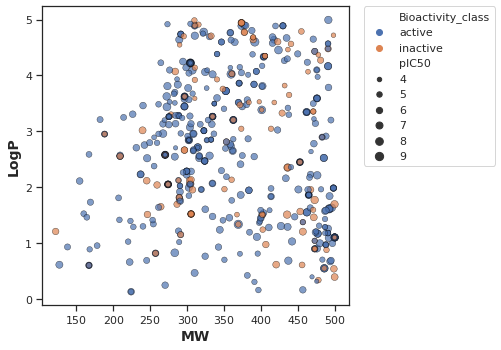

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(x='MW', y='LogP', data=df_final, hue='Bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')
plt.savefig('plot_bioactivity.pdf')

In [26]:
z=[]
dsds=pd.DataFrame([])
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
ms = [Chem.MolFromSmiles(mol) for mol in df_final.canonical_smiles]
fps = [FingerprintMols.FingerprintMol(x) for x in ms]
for i in range(0,len(fps)):
    for j in range(0,len(fps)):
        z.append(DataStructs.FingerprintSimilarity(fps[i],fps[j]))
    dsds=pd.concat([dsds,pd.DataFrame(z)],axis=1)
    z=[]

In [27]:
dsds

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1.000000,0.725901,0.884651,0.486752,0.486752,0.382646,0.396264,0.382646,0.339608,0.396264,...,0.349810,0.321041,0.396238,0.308892,0.335271,0.313534,0.308937,0.420126,0.388078,0.450957
1,0.725901,1.000000,0.693561,0.679335,0.679335,0.430225,0.449742,0.430225,0.374024,0.449742,...,0.339953,0.346911,0.455172,0.320144,0.387399,0.332400,0.323823,0.413069,0.402523,0.459977
2,0.884651,0.693561,1.000000,0.494631,0.494631,0.439109,0.455680,0.439109,0.352523,0.455680,...,0.350540,0.344590,0.437033,0.322084,0.366812,0.332621,0.324855,0.446472,0.393271,0.461538
3,0.486752,0.679335,0.494631,1.000000,1.000000,0.433881,0.447280,0.433881,0.381095,0.447280,...,0.330569,0.361932,0.414393,0.343629,0.365619,0.352018,0.348392,0.403073,0.386127,0.460920
4,0.486752,0.679335,0.494631,1.000000,1.000000,0.433881,0.447280,0.433881,0.381095,0.447280,...,0.330569,0.361932,0.414393,0.343629,0.365619,0.352018,0.348392,0.403073,0.386127,0.460920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0.313534,0.332400,0.332621,0.352018,0.352018,0.365649,0.385275,0.365649,0.339934,0.385275,...,0.525915,0.908676,0.335740,0.913317,0.289278,1.000000,0.910891,0.393979,0.361568,0.382671
540,0.308937,0.323823,0.324855,0.348392,0.348392,0.358034,0.375546,0.358034,0.336726,0.375546,...,0.564309,0.849658,0.318761,0.971925,0.276712,0.910891,1.000000,0.393817,0.365885,0.362090
541,0.420126,0.413069,0.446472,0.403073,0.403073,0.418803,0.412170,0.418803,0.376440,0.412170,...,0.309402,0.400253,0.405434,0.389417,0.382619,0.393979,0.393817,1.000000,0.281583,0.318903
542,0.388078,0.402523,0.393271,0.386127,0.386127,0.379553,0.386161,0.379553,0.346964,0.386161,...,0.275410,0.370416,0.398969,0.354248,0.380580,0.361568,0.365885,0.281583,1.000000,0.317212


In [28]:
df_final1=df_final.drop_duplicates(subset='canonical_smiles')
df_final=df_final1

In [29]:
from rdkit.Chem import Descriptors

desc_list = [n[0] for n in Descriptors._descList]
print(len(desc_list))
print(desc_list)

208
['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 

In [30]:
from rdkit.ML.Descriptors import MoleculeDescriptors

calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)
ms = [Chem.MolFromSmiles(mol) for mol in df_final.canonical_smiles]
rdkit_desc = [calc.CalcDescriptors(m) for m in ms]

print(len(rdkit_desc[0]))

208
(13.17604889280815, -0.5633556941295044, 13.17604889280815, 0.14079135872455928, 0.6038476674060945, 475.4010000000002, 455.24100000000016, 474.06840224, 160, 0, 0.25506496122959416, -0.3562617048058714, 0.3562617048058714, 0.25506496122959416, 1.1290322580645162, 2.0, 2.7096774193548385, 35.49826339842524, 10.080718991842462, 2.346648757861845, -2.4156812049123055, 2.2943795005023477, -2.5988997906911595, 7.094364449877837, -0.12277933765823233, 1.5614800391821075, 1062.6375657103406, 21.794317972067567, 16.501594689741996, 18.829949162706633, 15.02487714325259, 9.737955546968076, 11.373537304241424, 7.097639970593255, 8.944285406436215, 5.130498147784875, 6.745914791214505, 3.5415778058874205, 4.478473781104627, -2.6099999999999994, 16685426.463458363, 21.615576635532324, 9.680560926998155, 5.005999287361113, 193.95347260809572, 15.116608065707286, 6.041840829147961, 0.0, 5.907179729351506, 5.907179729351506, 0.0, 14.573052889090853, 0.0, 0.0, 11.336785877934737, 29.2682468489266

In [31]:
ssd=pd.DataFrame(rdkit_desc)

In [32]:
ssd.to_csv('results.csv')

In [33]:
mom=df_final.pIC50

In [34]:

ssd=ssd.dropna()
ssd
mom=mom.iloc[ssd.index]

In [35]:
from sklearn.feature_selection import VarianceThreshold
X_=ssd
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X_)
X.shape
mask = selection.get_support()
# select the corresponding column names from the original feature matrix
selected_columns = X_.columns[mask]

In [36]:
SXV=pd.DataFrame(X)

In [37]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

def kennard_stone(X, n_samples):
    distances = pairwise_distances(X)
    selected_indices = [np.argmax(np.min(distances, axis=1))]
    while len(selected_indices) < n_samples:
        max_min_distance = -1
        max_min_distance_index = -1
        
        for i in range(X.shape[0]):
            if i not in selected_indices:
                min_distance = np.min(distances[i, selected_indices])
                if min_distance > max_min_distance:
                    max_min_distance = min_distance
                    max_min_distance_index = i
        
        selected_indices.append(max_min_distance_index)
    
    selected_samples = X[selected_indices]
    return selected_samples, selected_indices
    
# Example usage:
# X: Input data matrix (n_samples x n_features)
# Y: Corresponding labels for each sample in X (n_samples,)
# n_samples: Number of samples to be selected
# Applying the Kennard-Stone algorithm
[a,b]=kennard_stone(X, 0.8*len(X))



In [38]:
a


array([[13.17604889, -0.56335569, 13.17604889, ...,  0.        ,
         1.        ,  0.        ],
       [14.40052527, -1.84428933, 14.40052527, ...,  0.        ,
         0.        ,  2.        ],
       [13.95282939, -2.1612542 , 13.95282939, ...,  0.        ,
         0.        ,  2.        ],
       ...,
       [ 4.1958642 ,  0.83444444,  4.1958642 , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.04814815,  0.79509259,  5.04814815, ...,  0.        ,
         0.        ,  0.        ],
       [11.62393896, -0.16958333, 11.62393896, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
XSC=SXV.drop(b)

In [40]:
sel=mom.iloc[b]
msm=pd.DataFrame(mom)
msm=msm.iloc[XSC.index]

In [41]:
msm

,pIC50
4,9.229148
7,8.397940
9,8.318759
17,8.031517
19,8.000000
...,...
511,4.524329
518,4.489455
519,4.487716
522,4.437707


In [42]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,mom, test_size=0.2)

In [44]:
import pickle

In [51]:
from sklearn.gaussian_process import GaussianProcessRegressor
np.random.seed(100)
model=RandomForestRegressor(n_estimators=1000)
models_train = model.fit(X_train,Y_train)
r2=model.score(X_train,Y_train)
r2

0.9224147518851327

0.4554947326515887

In [83]:
with open("model.pkl", "rb") as f:                         # TRIAL WITH RANDOM SELECTION SPLITTING
    model = pickle.load(f)

In [52]:
Y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(Y_test,Y_pred)

In [53]:
rmse

0.6883662236940016

In [54]:
model.score(X_test,Y_test)

0.4554947326515887

<function matplotlib.pyplot.show(close=None, block=None)>

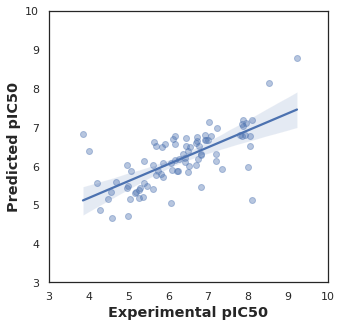

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=Y_test,y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
ax.figure.set_size_inches(5, 5)
plt.show

In [56]:
df_final=df_final.sort_values(by='pIC50',ascending=False)

In [57]:
df_final

,molecule_chembl_id,canonical_smiles,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL5174111,O=C(NCc1cccs1)[C@@H]1CN(C(=O)c2cccnc2)CCN1c1cc...,active,492.319,1.61040,3.0,6.0,9.397940
1,CHEMBL5204987,O=C(NCc1cccs1)[C@@H]1CN(C(=O)c2cc(=O)[nH]c(=O)...,active,304.393,4.22142,2.0,2.0,9.397940
2,CHEMBL5188502,O=C(NCc1cccs1)[C@@H]1CN(C(=O)c2cncc3ccccc23)CC...,active,369.208,1.33240,2.0,4.0,9.356547
3,CHEMBL5188982,O=C(NCc1ccco1)[C@@H]1CN(C(=O)c2cc(=O)[nH]c(=O)...,active,391.540,4.59822,3.0,4.0,9.318759
4,CHEMBL5181886,O=C(NCc1ccco1)C1CN(C(=O)c2cc(=O)[nH]c(=O)[nH]2...,active,359.473,4.02292,3.0,3.0,9.229148
...,...,...,...,...,...,...,...,...
539,CHEMBL5207993,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,active,302.330,2.84080,1.0,4.0,4.000000
540,CHEMBL5178853,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,active,302.330,2.84080,1.0,4.0,4.000000
541,CHEMBL1173049,COc1ccc(CNC(=O)C2CCN(Cc3cccc4ccccc34)CC2)cc1,inactive,499.534,1.09718,3.0,5.0,3.996971
542,CHEMBL18786,CN(C)CCCSc1ccccc1NC(=O)/C=C/c1ccccc1,active,270.240,2.57680,3.0,5.0,3.903333


In [66]:
from sklearn.gaussian_process import GaussianProcessRegressor
np.random.seed(100)
model1=RandomForestRegressor(n_estimators=1000)
models_train1 = model1.fit(a,sel)


In [67]:
models_test1 = model1.fit(XSC,msm)
r21=model1.score(XSC,msm)
r21

/tmp/ipykernel_74/1323382152.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models_test1 = model1.fit(XSC,msm)


0.8955955481201422

In [68]:
with open("model1.pkl", "rb") as g:                      # TRIAL WITH KENNARD-STONE ALGORITHM
    model1 = pickle.load(g)

In [69]:
Y_pred1=model1.predict(XSC)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(msm,Y_pred1)

In [70]:
rmse

0.12166258891842589

In [71]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Split the data into a training set and a test set
#X1_train, X1_test, y1_train, y1_test = train_test_split(, y, test_size=0.2)

# Fit a model to the training set
model2 = model1
model2.fit(a, sel)

# Randomly shuffle the response values in the test set
y_test_shuffled = np.random.permutation(msm)

# Fit a model to the shuffled test set
model_shuffled = model1
model_shuffled.fit(XSC, y_test_shuffled)

# Evaluate the performance of the original model and the shuffled model
r2_original = model2.score(XSC, msm)
r2_shuffled = model_shuffled.score(XSC, y_test_shuffled)

print("R2 for original model:", r2_original)
print("R2 for shuffled model:", r2_shuffled)

/tmp/ipykernel_74/3302432813.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_shuffled.fit(XSC, y_test_shuffled)


R2 for original model: -0.07959465954357814
R2 for shuffled model: 0.7823305498477299


<function matplotlib.pyplot.show(close=None, block=None)>

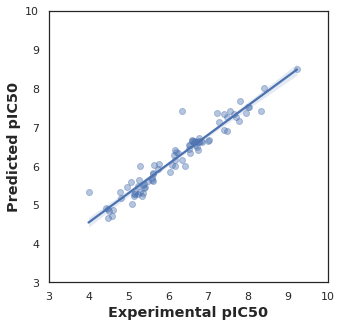

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=msm,y=Y_pred1, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
ax.figure.set_size_inches(5, 5)
plt.show

In [111]:
df_final=df_final.sort_values(by='pIC50',ascending=False)

In [112]:
df_final

,molecule_chembl_id,canonical_smiles,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL5174111,O=C(NCc1cccs1)[C@@H]1CN(C(=O)c2cccnc2)CCN1c1cc...,active,492.319,1.61040,3.0,6.0,9.397940
1,CHEMBL5204987,O=C(NCc1cccs1)[C@@H]1CN(C(=O)c2cc(=O)[nH]c(=O)...,active,304.393,4.22142,2.0,2.0,9.397940
2,CHEMBL5188502,O=C(NCc1cccs1)[C@@H]1CN(C(=O)c2cncc3ccccc23)CC...,active,369.208,1.33240,2.0,4.0,9.356547
3,CHEMBL5188982,O=C(NCc1ccco1)[C@@H]1CN(C(=O)c2cc(=O)[nH]c(=O)...,active,391.540,4.59822,3.0,4.0,9.318759
4,CHEMBL5181886,O=C(NCc1ccco1)C1CN(C(=O)c2cc(=O)[nH]c(=O)[nH]2...,active,359.473,4.02292,3.0,3.0,9.229148
...,...,...,...,...,...,...,...,...
539,CHEMBL5207993,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,active,302.330,2.84080,1.0,4.0,4.000000
540,CHEMBL5178853,CC(C)(C)[C@H](NC(=O)C(F)(F)F)C(=O)N1C[C@H]2[C@...,active,302.330,2.84080,1.0,4.0,4.000000
541,CHEMBL1173049,COc1ccc(CNC(=O)C2CCN(Cc3cccc4ccccc34)CC2)cc1,inactive,499.534,1.09718,3.0,5.0,3.996971
542,CHEMBL18786,CN(C)CCCSc1ccccc1NC(=O)/C=C/c1ccccc1,active,270.240,2.57680,3.0,5.0,3.903333


In [113]:
xxxc=df_final.head(10)

In [114]:
xxxc.to_csv('top10s.csv')

In [115]:
fam1=['C1CN(CCN1C2=C(C=C(C=C2)NC(=O)C3=CN=CC=C3)Cl)C(=O)C4=CC=CS4','C1CN(CCN1C2=CC=C(C=C2)NC(=O)C3=C(N=CC=C3)Cl)C(=O)C4=CC=CS4','C1CCN(C1)CCNCC(=O)NC(C2=CC=NC=C2)SC3=C(C=CC=N3)C(=O)NC4=CC=C(C=C4)Cl','CC1=CC=C(C=C1)N(CC(=O)NCC2=CC=CS2)C(=O)C3=CN=C(C=C3)Cl','C1CCC(C1)NC(=O)C(C2=CC=NC=C2)N(C3=CC=C(C=C3)Cl)C(=O)CNC(=O)C4=CC=CS4','C1CN(CCN1C2=C(C=C(C=C2)NC(=O)C3=C(N=CC=C3)Cl)Cl)C(=O)C4=CC=CS4','C1CCC(C1)NC(=O)C(C2=CN=CC=C2)N(C3=CC=C(C=C3)Cl)C(=O)CNC(=O)C4=CC=CS4','CCSCC(C(=O)NCC1=CN=CC=C1)N(CCNC(=O)C2=C(C=CN=C2Cl)Cl)C(=O)CC3=CC=CS3','C1CN(C(CN1C(=O)C2=CN=CC3=CC=CC=C32)C(=O)NCC4=CC=CS4)C5=CC(=C(C=C5)Cl)Cl','C1=CSC(=C1)CN2C(=O)C(=CNC2=O)C(=O)NC3=CC(=C(C=C3)Cl)Cl','C1CN(CCN1CCNC(=O)C2=CC=CS2)C(=O)NC3=CC(=C(C=C3)Cl)Cl','C1=CC=C(C=C1)CN2C(=C(C(=O)NC2=O)N(CC3=CC=CO3)C(=O)C4=CC=C(C=C4)Cl)N','CCN1C2=C(C(NC1=O)C3=C(C=C(C=C3)Cl)Cl)C(=O)N(C2)CC(=O)N4CCN(CC4)C(=O)C5=CC=CO5','CCCCN1C(=C(C(=O)NC1=O)N(CC2=CC=CO2)C(=O)C3=CC=C(C=C3)Cl)N','C1C2=C(NCN1CC3=CC=CO3)N(C(=O)NC2=O)CC4=CC=CC=C4Cl','CC(C1=C(C=C(C=C1)Cl)Cl)[NH2+]CC(=O)NC(=O)NCC2=CC=CO2','C[NH+](CC1=C(C=C(C=C1)Cl)Cl)CC(=O)NC(=O)NCC2=CC=CO2','C1=COC(=C1)CN2C(=O)C(=CC3=C(C=C(C=C3)Cl)Cl)C(=O)NC2=O','C1CC1C(C(=O)NC(CC2CCNC2=O)C(=O)CCl)NC(=O)C3=CC4=CC=CC=C4N3','C1=CC=C(C=C1)CN2C(=C(C(=O)NC2=O)N(CC3=CC=CO3)C(=O)CCC4=CC=C(C=C4)Cl)N','CC1CN(CC1CCN)C(=O)CCNC(=O)C2=CC3=CC=CC=C3N2','CC(C)C1C(CCN1)C(=O)N2CCN(CC2)C(=O)C3=CC4=CC=CC=C4N3','CC(C)CC(C(=O)NN(CC1CCNC1=O)C(=O)C(F)Cl)NC(=O)C2=CC3=C(N2)C=CC=C3F','CC(C)NC(=O)C(=O)NNC(=O)C1=CC2=CC=CC=C2N1','CN1C2=CC=CC=C2C=C1C(=O)N3CCCC3C(=O)NC(CCC(=O)NN)C(=O)NCCCN','CC(C)(C)CC(C(=O)NC(CC1CCNC1=O)C(=O)CCl)NC(=O)C2=CC3=CC=CC=C3N2','C1CC1CC(C(=O)NN(CCC(=O)N)C(=O)C(F)Cl)NC(=O)C2=CC3=CC=CC=C3N2','C1CN(CC1CNC(=O)C2=CC3=CC=CC=C3N2)C(=O)CCl','CC(C)CC(C(=O)NN(CCC(=O)NC)C(=O)CCl)N(C)C(=O)C1=CC2=CC=CC=C2N1','CC1(CC1)CC(C(=O)NN(CC2CCNC2=O)C(=O)C(F)Cl)NC(=O)C3=NOC(=C3)C(F)F','CC1=CC(=NO1)C(=O)NC(CC2CC2)C(=O)NN(CC3CCNC3=O)C(=O)C(F)Cl','C1CNC(=O)C1CN(C(=O)C(F)Cl)NC(=O)C(CC2=CC=CC=C2)NC(=O)C3=CC4=C(N3)C=CC=C4F','CC(=O)N1CC(C(C1)NC(=O)C2=CC3=C(N2)C(=CC=C3)F)C(=O)N','C1CCC(CC1)CC(C(=O)NN(CCC(=O)N)C(=O)CCl)NC(=O)C2=CC3=CC=CC=C3N2']

In [116]:
fam2=['CC(C)C(C(=O)NC(CC1=CC=CC=C1)C(=O)NC(CC2CCNC2=O)C=O)NC(=O)C3=CC4=CC=CC=C4N3','C1CNC(=O)C1CC(C=O)NC(=O)C(CC2=CC=CC=C2)NC(=O)C3=CC4=CC=CC=C4N3']

In [117]:
calc1 = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)
ms2 = [Chem.MolFromSmiles(moles) for moles in fam1 ]
rdkit_desc2 = [calc.CalcDescriptors(m) for m in ms2]
aaa=pd.DataFrame(rdkit_desc2)



In [118]:
aaa=aaa.loc[:,aaa.columns[mask]]
aaa=np.array(aaa)

In [119]:
Y_pred=model.predict(aaa)

In [120]:
Y_pred

array([5.78045833, 5.8869053 , 6.44434368, 5.85297564, 5.88284583,
       5.74770366, 5.87163789, 6.37147975, 5.78462253, 6.46621109,
       5.83525429, 6.47990597, 6.60574991, 6.60652941, 6.13110173,
       5.67885488, 5.73874888, 6.09382254, 7.0873871 , 6.47481476,
       6.03647836, 6.18183222, 7.40224932, 6.7100407 , 7.03523555,
       7.20348646, 6.80870241, 6.21773277, 7.67600939, 6.81735489,
       6.67863755, 7.49298477, 6.23989376, 7.12583721])

In [123]:
Ypred1=model1.predict(aaa)

In [125]:
Y_pred

array([5.81489667, 5.88340746, 6.48685259, 5.88374891, 5.93117037,
       5.82360299, 5.90901576, 6.40412557, 5.86504859, 6.54204359,
       5.8469606 , 6.42656008, 6.6839613 , 6.56130917, 6.18091859,
       5.71084667, 5.76063137, 6.0523731 , 7.04935289, 6.45008099,
       5.96695527, 6.1328203 , 7.41736746, 6.73837466, 6.97448352,
       7.17633364, 6.81462575, 6.20597922, 7.72060275, 6.8043527 ,
       6.6531462 , 7.4816411 , 6.20201923, 7.12461778])

In [65]:
-np.log10(0.009*10**(-6))

8.045757490560675

In [131]:
ddxc=pd.concat([pd.DataFrame(fam1),pd.DataFrame(Ypred1),pd.DataFrame(Y_pred)],axis=1)

In [132]:
ddxc

,0,0,0
0,C1CN(CCN1C2=C(C=C(C=C2)NC(=O)C3=CN=CC=C3)Cl)C(...,5.814897,5.780458
1,C1CN(CCN1C2=CC=C(C=C2)NC(=O)C3=C(N=CC=C3)Cl)C(...,5.883407,5.886905
2,C1CCN(C1)CCNCC(=O)NC(C2=CC=NC=C2)SC3=C(C=CC=N3...,6.486853,6.444344
3,CC1=CC=C(C=C1)N(CC(=O)NCC2=CC=CS2)C(=O)C3=CN=C...,5.883749,5.852976
4,C1CCC(C1)NC(=O)C(C2=CC=NC=C2)N(C3=CC=C(C=C3)Cl...,5.931170,5.882846
5,C1CN(CCN1C2=C(C=C(C=C2)NC(=O)C3=C(N=CC=C3)Cl)C...,5.823603,5.747704
6,C1CCC(C1)NC(=O)C(C2=CN=CC=C2)N(C3=CC=C(C=C3)Cl...,5.909016,5.871638
7,CCSCC(C(=O)NCC1=CN=CC=C1)N(CCNC(=O)C2=C(C=CN=C...,6.404126,6.371480
8,C1CN(C(CN1C(=O)C2=CN=CC3=CC=CC=C32)C(=O)NCC4=C...,5.865049,5.784623
9,C1=CSC(=C1)CN2C(=O)C(=CNC2=O)C(=O)NC3=CC(=C(C=...,6.542044,6.466211


In [133]:
ddxc.to_csv('drugses.csv',index=False)